<a href="https://colab.research.google.com/github/plp940/ml_magic_gamma_telescope/blob/main/ml_magic_gamma_telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#features qualitative-
categorical data(group ), nominal data (no inherent data)

#encodings
we avoid label type encoding with numbers as the higher number assigned to the noun ml assumes this noun is higher as the num
3>2>1

one hot encoding  - if the input is matching then labeld as 1 or else by 0
one hot encoding  example
usa     1000
india   0100
france  0010
russia  0001  labling 1 in the place or if it is true marking as 1 if not 0

#feature Qualitative
categorical data-finite number of groups ,ordinal data(inherent data)
--for qualitative we can just mark with numbers
from unhappy to happy we can rate from 1-5 so the number here can also have the number quality of the highest to lowest

#feature Quantitative
numerical valued data, continous, discrete



target variable encoding dont knaow where it will get

#loss functions
l1 loss  loss = sum(|yreal -y predicted |)
binary cross_entropy loss [loss decreases as performance gets better]
l2loss loss=sum((yreal- ypred)^2)
---
#acuracy


In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# metadata
print(magic_gamma_telescope.metadata)

# variable information
print(magic_gamma_telescope.variables)


{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [7]:
y.head()

,class
0,g
1,g
2,g
3,g
4,g


In [8]:
 y["class"].unique()

array(['g', 'h'], dtype=object)

In [9]:
 y["class"] = (y["class"] =='g').astype(int)

/tmp/ipython-input-9-1369151451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = (y["class"] =='g').astype(int)


In [10]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


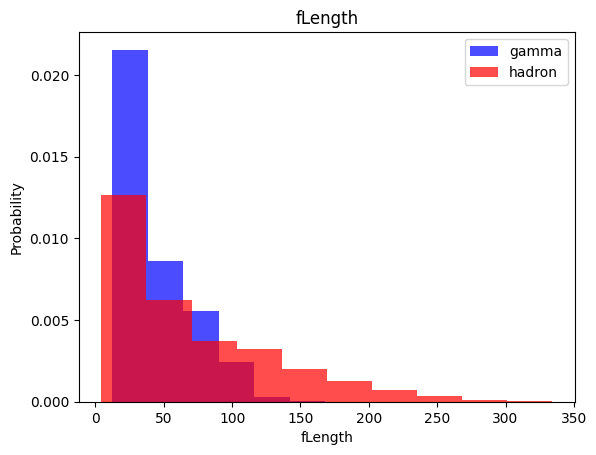

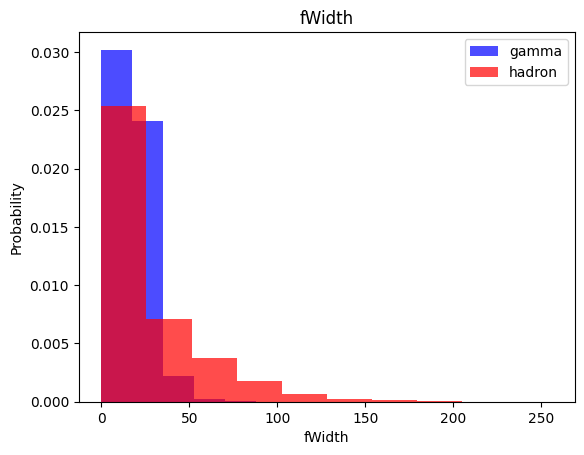

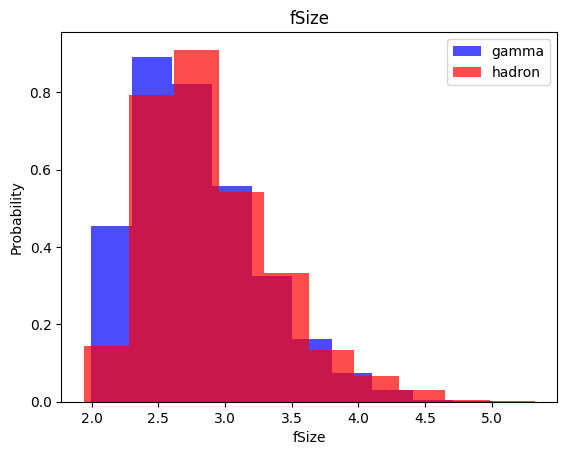

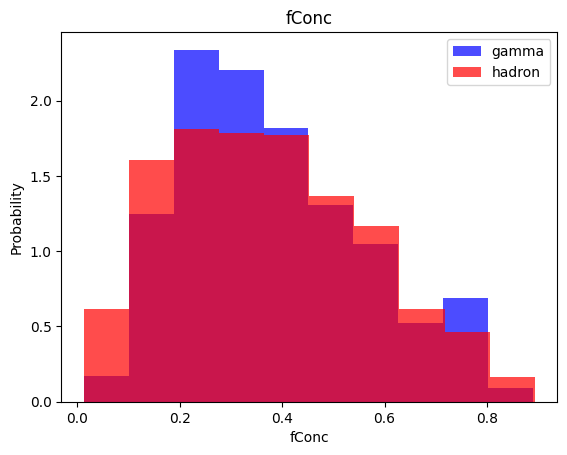

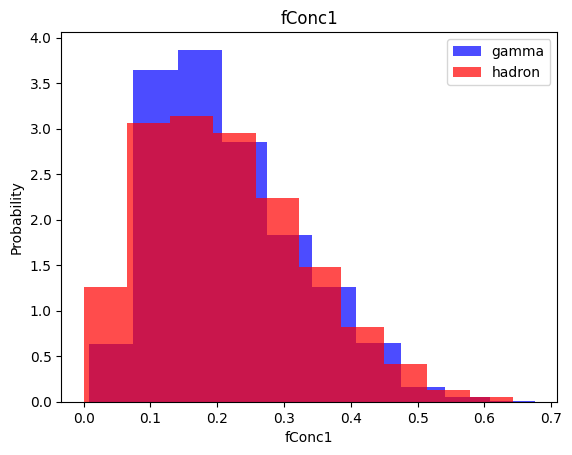

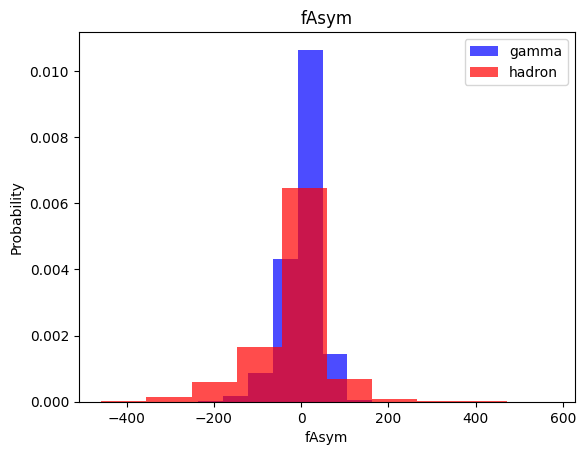

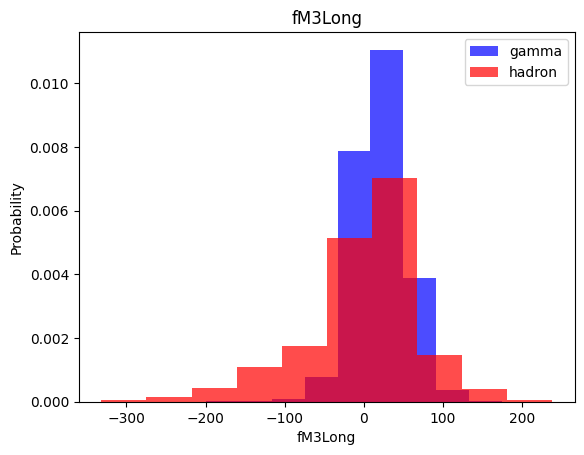

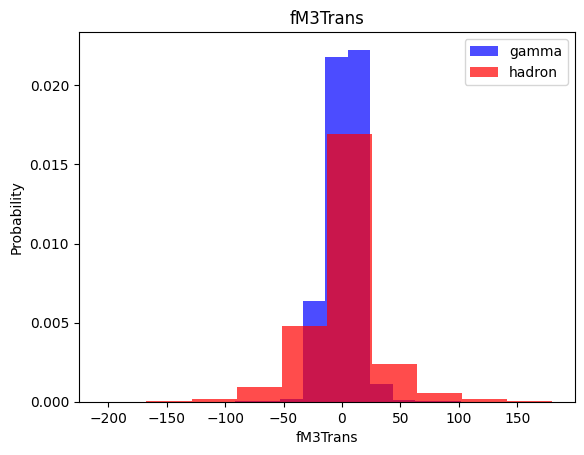

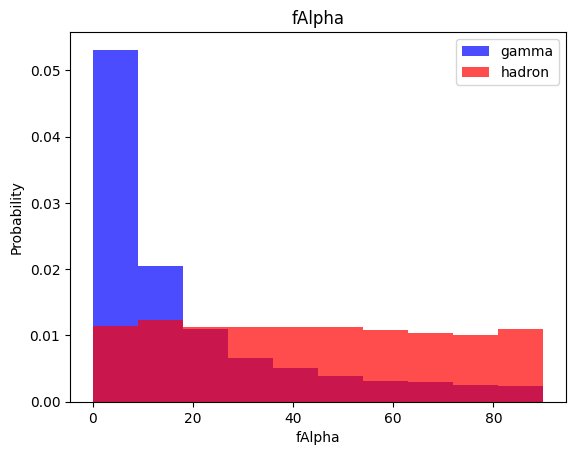

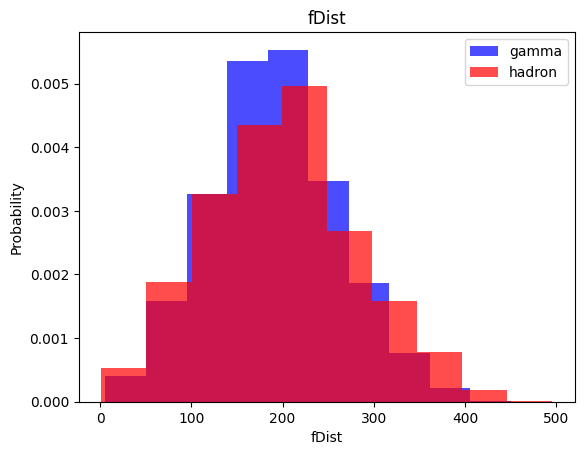

In [11]:
import matplotlib.pyplot as plt

for label in X.columns:
  plt.hist(X[y["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(X[y["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

train ,validation,test datasetc

In [12]:
import numpy as np
df = pd.concat([X, y], axis=1)
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])  #60 -80% training data 80%-100% test data

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  #create whole data into huge 2d numpy
  data = np.hstack((X,np.reshape(y,(-1,1))))
  return data ,X ,y

In [16]:
print(len(train[train.iloc[:, -1] == 1]))
print(len(train[train.iloc[:, -1] == 0]))
#this create issue as gamma is 7000 and hadron is 4000 and we oversample the data to make values closer so then we imported the randomsmapler

7405
4007


In [17]:
#after writing the code for the oversample for sampling the data that is smaller
train,X_train,y_train=scale_dataset(train, oversample=True)
valid,X_valid,y_valid=scale_dataset(valid, oversample=False)
test,X_test,y_test=scale_dataset(test, oversample=False)

# Issue if it is not done (without oversampling):

Biased Model: The model will likely be biased towards the majority class, as it sees many more examples of that class during training. misleading accuracy

we are only oversampling the train data not the validatio data or the test data as it needs to perform on that there is no point in oversampling them

#first model knn k nearest neigbhour
k tells u no for the neighbour near to judge the case

whats around you and you can guess based on that cluster
euclidean distance - which ever datapoint is nearer can have the similar condition [binary classification example - there or not there]
d=sqrt_/(x1-x2)^2 + (y1-y2)^2

In [18]:
#first model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1351
           1       0.86      0.86      0.86      2453

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



precision is how many of them are true positive out of all the modal has labled as true and

recall in total labeling of positives how many of them are right actually



---
NAIVE bayes
false positive, true positive
false negative,true negative
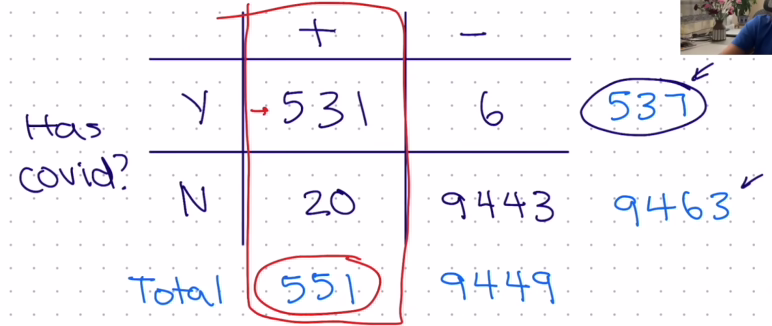
what is the probability of having covid in  a positive test
p(covid/+test) =531/551


naive bayes asusme all the feature are independent of each other
if the fare of the train is depended on the class yet naive bayes assumes as independent

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

#logistic regression
p = mx+b


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [25]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1351
           1       0.84      0.81      0.83      2453

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



#support vector machine
we need to find the some sort of line that divides the 2 features, that line is the svm model
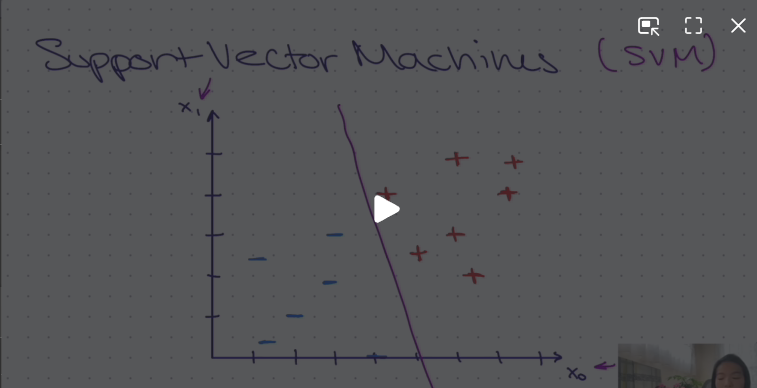

in 1d it is a line in 2d it is a plane
so we need to find the hyperplane tha tbest divides the data
and better the line should not be closer to the datapoint will be best


*  margins is the imaginary assumend line from the closest point
*  and we want a line that has largest marign
*the datapoint that can be used to make the line is called support vectors

for data like single plane we can use the kernal trick and we can plot them
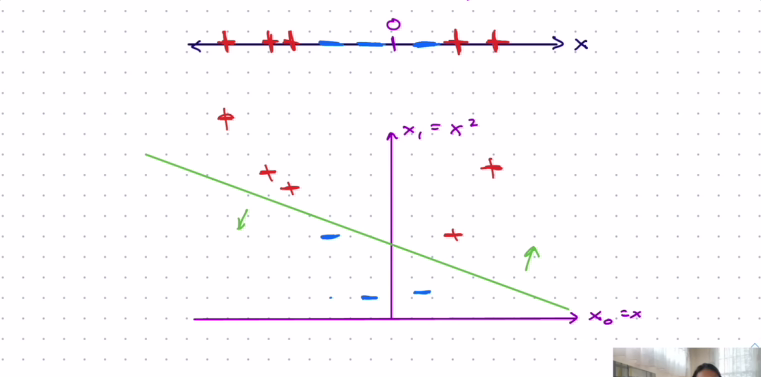





In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [29]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1351
           1       0.89      0.90      0.89      2453

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#neural network with tensorflow

In [31]:
import tensorflow as tf



In [33]:
#defining ploting
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()
def plot_history(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [32]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')#final layer output- so by using sigmoid it will turn into 0 or 1
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=0
)

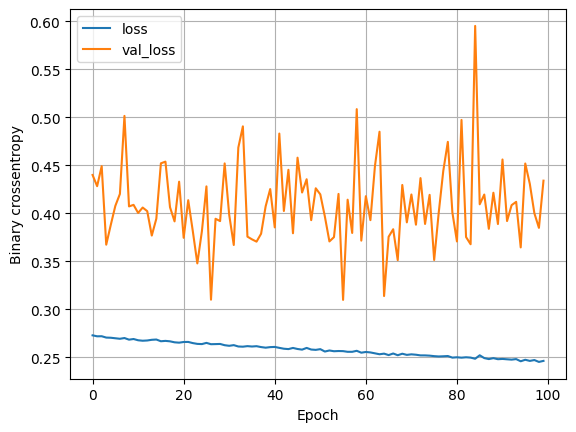

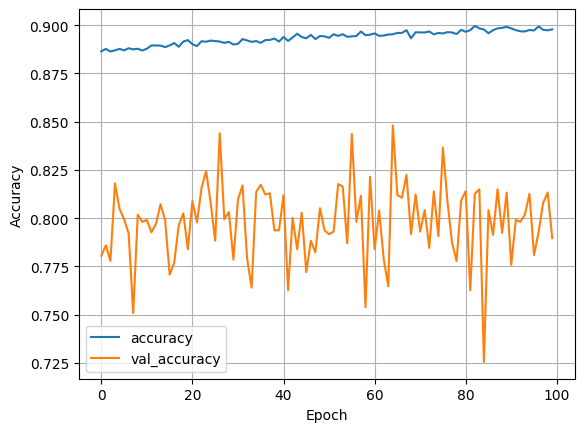

In [38]:
plot_loss(history)
plot_history(history)